# **Business Case: Yulu - Hypothesis Testing**


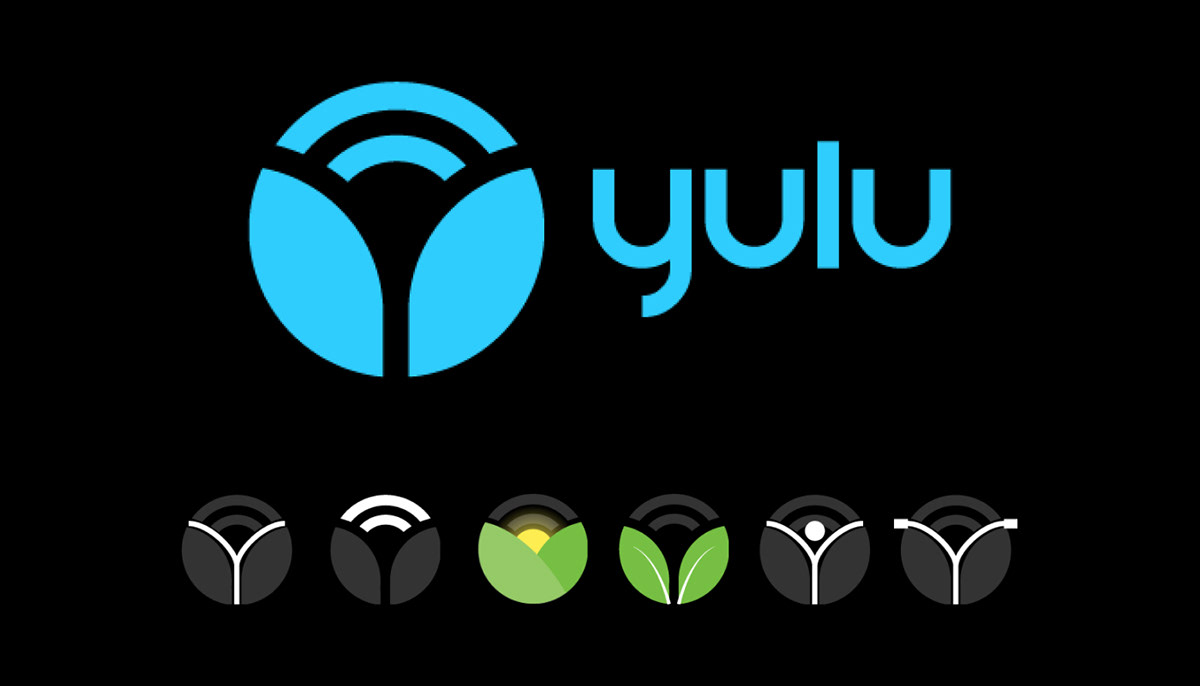

 **About:**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [105]:
# Loading liabaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind , levene, shapiro,f_oneway,kruskal,chi2_contingency

# Dataset Features / Column Profiling

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
  - 1: Clear, Few clouds, partly cloudy, partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [3]:
# Loading Dataset

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O "yulu.csv"

--2024-08-28 18:35:15--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.91, 18.64.229.135, 18.64.229.172, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu.csv’

yulu.csv            100%[===================>] 633.16K  --.-KB/s    in 0.06s   

2024-08-28 18:35:15 (11.2 MB/s) - ‘yulu.csv’ saved [648353/648353]



In [4]:
data = pd.read_csv("yulu.csv")

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
for i in data.columns:
  print(f"Unique Values of {i} : {data[i].nunique()}")

Unique Values of datetime : 10886
Unique Values of season : 4
Unique Values of holiday : 2
Unique Values of workingday : 2
Unique Values of weather : 4
Unique Values of temp : 49
Unique Values of atemp : 60
Unique Values of humidity : 89
Unique Values of windspeed : 28
Unique Values of casual : 309
Unique Values of registered : 731
Unique Values of count : 822


# Categorical data Conversion

In [9]:
cat_col = ["season","holiday","workingday","weather"]

for i in cat_col:
  data[i] = data[i].astype("object")

# "datetime" Column need to changed into Datetime data type

In [10]:
data["datetime"] = pd.to_datetime(data["datetime"])

# Time period range

In [11]:
print(f"Minimum Time Entry : { data['datetime'].min() }")
print(f"Maximum Time Entry : { data['datetime'].max() }")

Minimum Time Entry : 2011-01-01 00:00:00
Maximum Time Entry : 2012-12-19 23:00:00


In [12]:
print(f"Entry Range : {data['datetime'].max() - data['datetime'].min()} ")

Entry Range : 718 days 23:00:00 


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [14]:
data.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**🔍 Insights**

- datetime: The data spans from January 1, 2011, to December 19, 2012, with a mean datetime around late December 2011.
- season: The most frequent season is the fourth season, appearing 2734 times.
- holiday: Holidays make up a small portion of the data, with 10575 entries being non-holidays.
- workingday: The majority of the data points (7412) occur on working days.
- weather: The most common weather condition is categorized as 1, appearing 7192 times.
- temp: The average temperature recorded is approximately 20.23°C.
- atemp: The average "feels-like" temperature is slightly higher at 23.66°C.
- humidity: The mean humidity is around 61.89%, with a wide range from 0% to 100%.
- windspeed: The average windspeed is about 12.8 units, with a standard deviation of 8.16 units.
- casual: Casual users have a mean count of around 36, with a maximum of 367.
- registered: Registered users have a mean count of approximately 155, with a maximum of 886.
- count: The total bike rental count per hour has a mean of 191, with a maximum of 977.

# Null Check

In [15]:
data.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no null values present in the dataset

# Duplicate Entries Check

In [16]:
data.duplicated().sum()

0

There are no duplicate values present in the dataset

# Replacing Values of Season , holiday and workingday Column


- Season : season (1: spring, 2: summer, 3: fall, 4: winter)
- Holiday : holiday (1 : Yes, 0 : No )
- Workingday : workingday (1 : Yes, 0 : No )

In [17]:
data["season"] = data["season"].replace({1: "Spring",  2: "Summer" , 3: "Fall" , 4 : "Winter"})

In [18]:
data["season"].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [19]:
data["holiday"] = data["holiday"].replace({1 : "Yes" , 0 :"No"})

In [20]:
data["holiday"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
data["workingday"] = data["workingday"].replace({1 : "Yes" , 0 :"No"})

In [22]:
data["workingday"].unique()

array(['No', 'Yes'], dtype=object)

# Uni-Variate Analysis

In [23]:
cat_col

['season', 'holiday', 'workingday', 'weather']

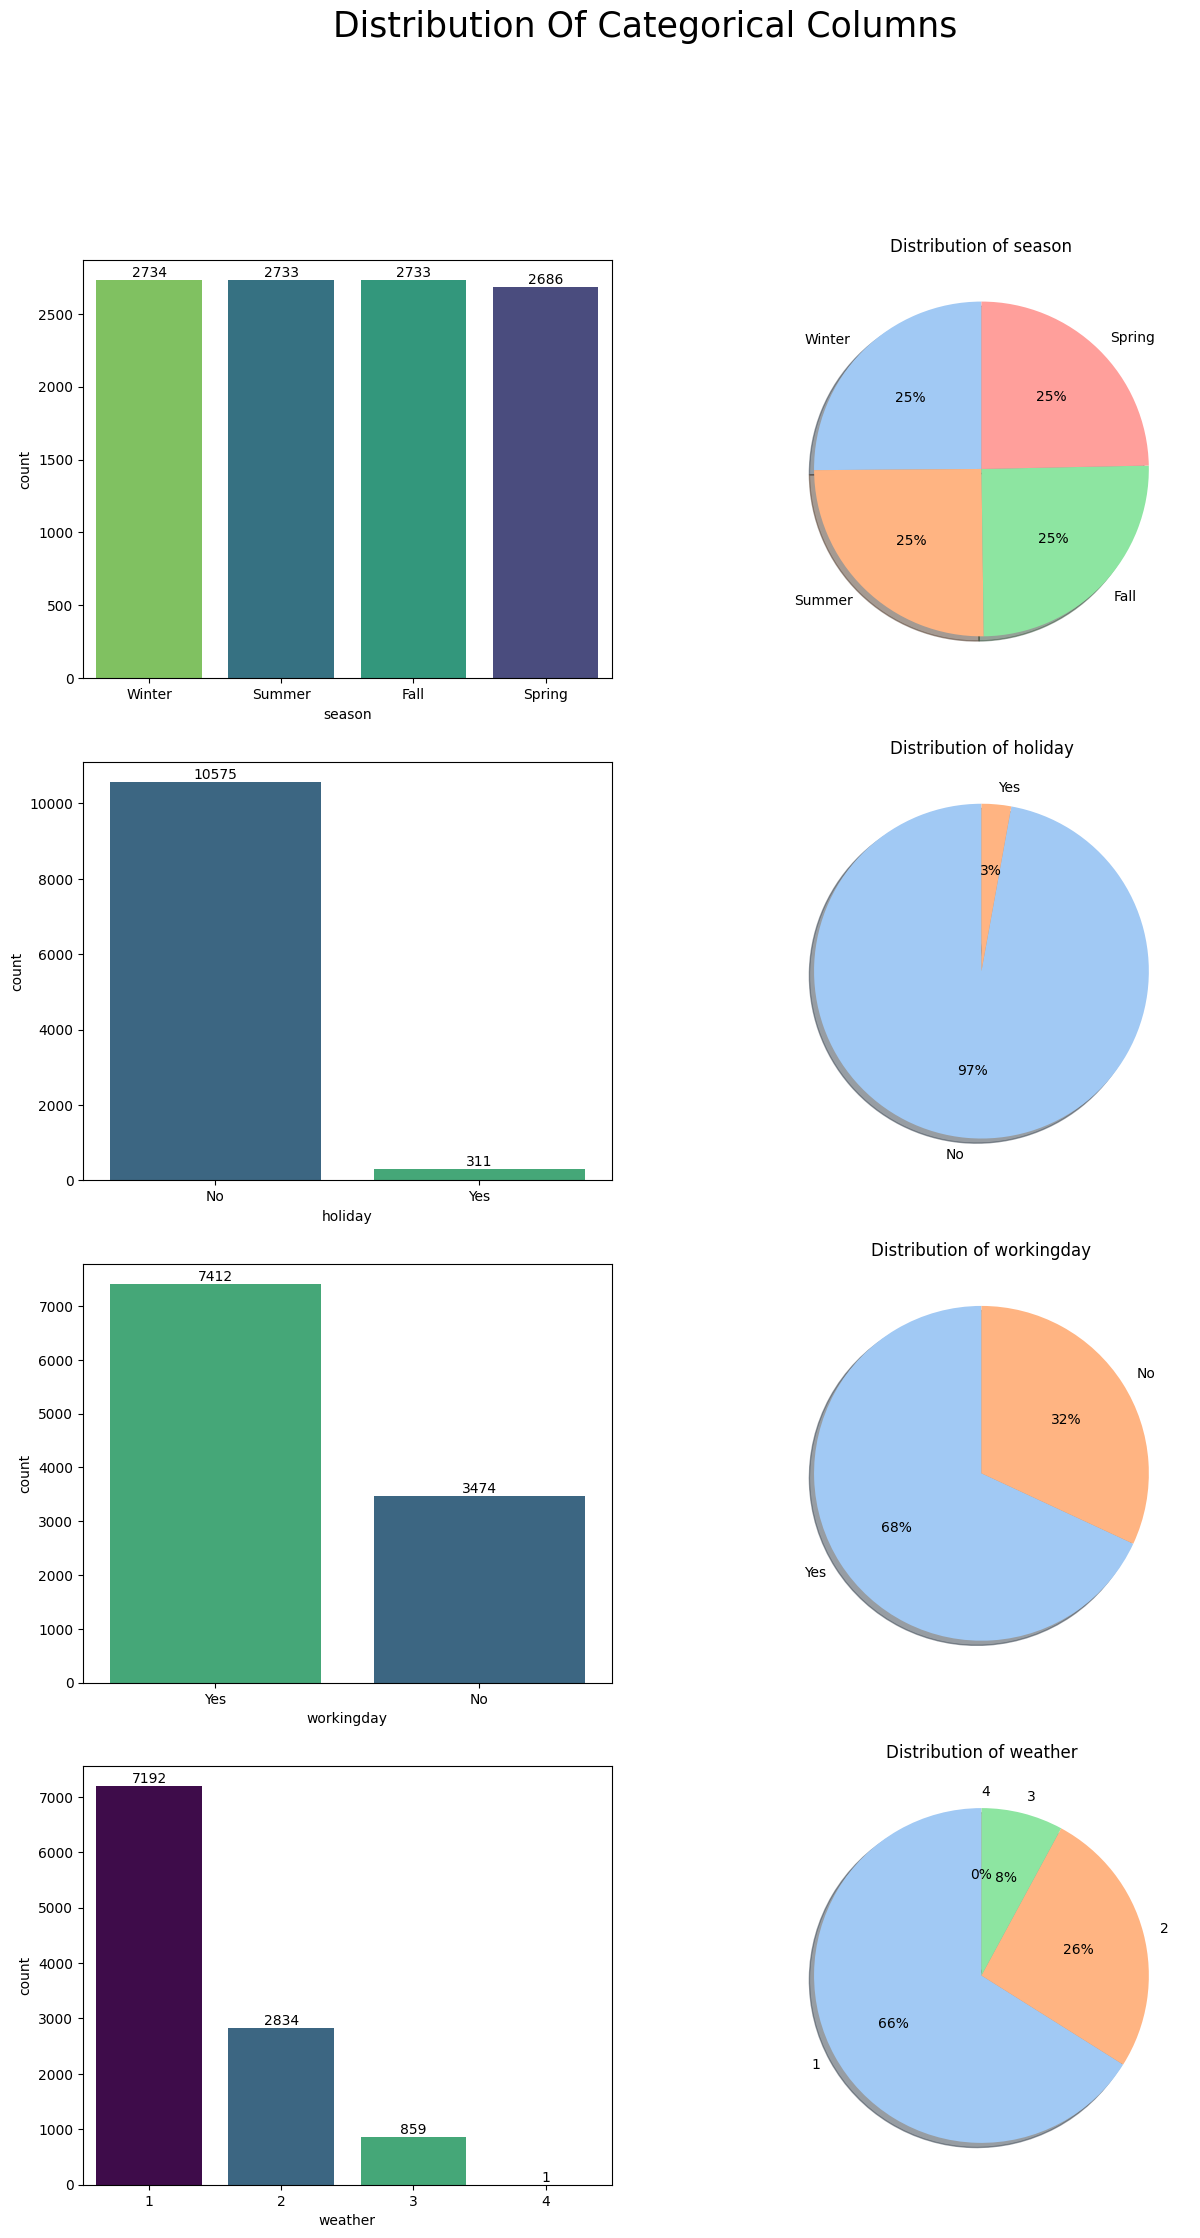

In [24]:
counter = 1
plt.figure(figsize=(15,25))
for i , j in enumerate(cat_col):
  i = i+counter
  plt.subplot(4,2,i)
  bar = sns.countplot(x = data[j], data = data , hue = j , legend = False, order = data[j].value_counts().index , palette = "viridis" )
  for k in bar.containers:
    bar.bar_label(k)
  plt.subplot(4,2,i+1)
  plt.pie(data[j].value_counts(), labels = data[j].value_counts().index , autopct = "%.f%%", shadow = True,startangle = 90 , colors = sns.color_palette("pastel"))
  plt.title(f"Distribution of {j}")
  counter = counter+1
plt.suptitle("Distribution Of Categorical Columns" , fontsize = 25)
plt.show()


**🔍 Insights**

- The data is evenly / Uniformly distributed across seasons.
- Non-holidays make up 97% of the data, with 10575 entries, while holidays account for only 311 entries.
- About 68% of the data (7412 entries) corresponds to working days, reflecting the typical workweek.
- Clear or partly cloudy weather conditions are observed in 66% of the entries (7192 out of 10886), making it the most common weather type.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


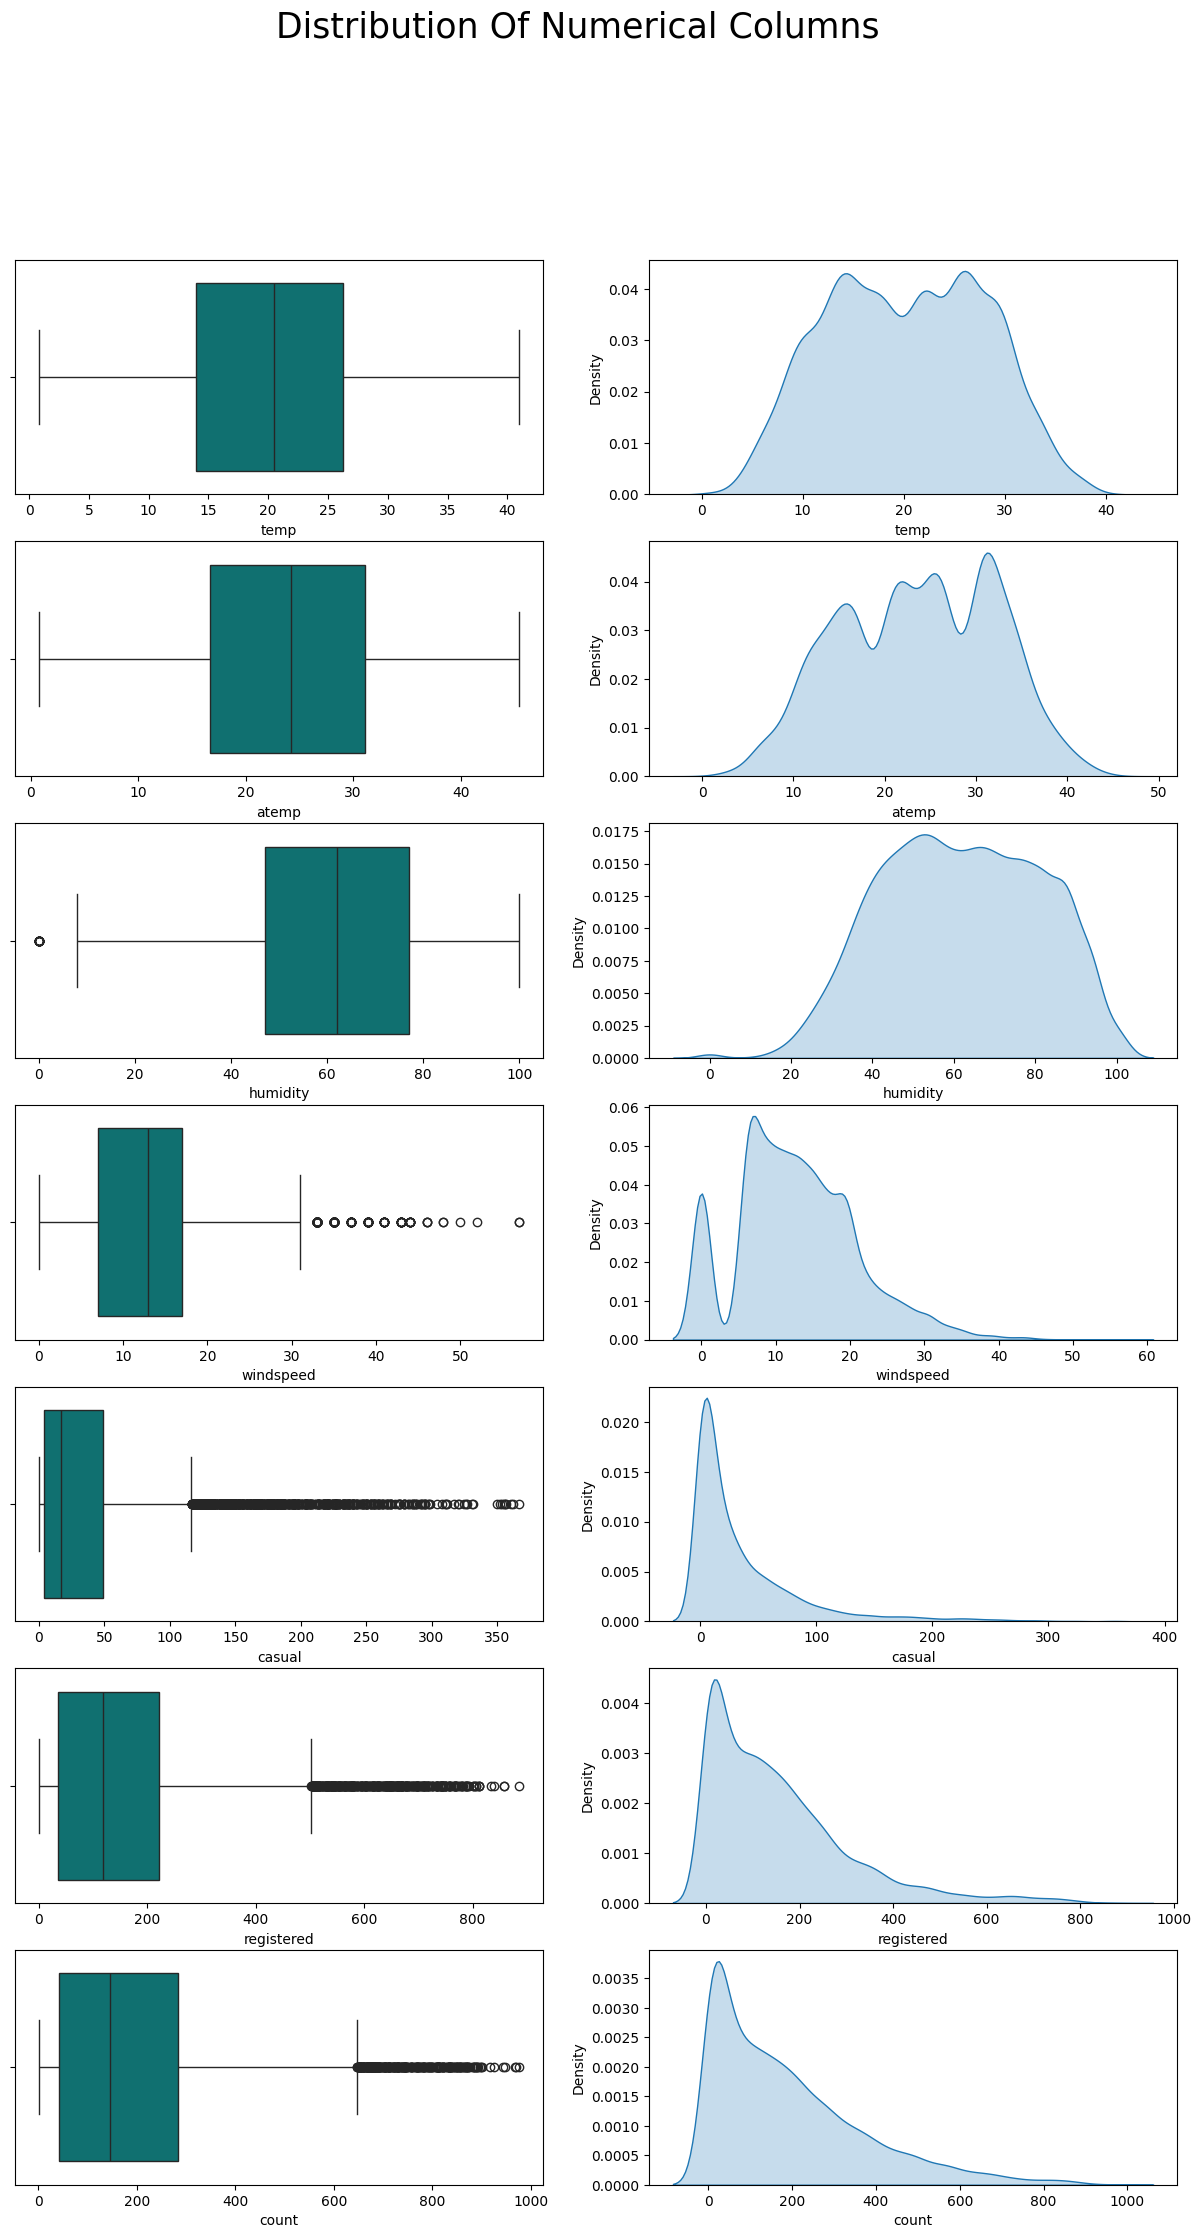

In [26]:
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
counter = 1
plt.figure(figsize = (15,25))
for i, j in enumerate(num_col):
  i = i + counter
  plt.subplot(7,2,i)
  sns.boxplot(x = data[j], color = "teal")
  plt.subplot(7,2,i+1)
  sns.kdeplot(x = data[j],fill = True)
  counter = counter + 1
plt.suptitle("Distribution Of Numerical Columns" , fontsize = 25)
plt.show()


**Numerical Column Analysis 🧐**
- Temperature ('temp'): Ranges from 0.82 to 41.0°C, with a mean of 20.23°C and moderate variability.
- Apparent Temperature ('atemp'): Ranges from 0.76 to 45.455°C, with a mean of 23.66°C and moderate variability.
- Humidity ('humidity'): Values span from 0 to 100, with an average of 61.89.
- Wind Speed ('windspeed'): Wind speeds vary from 0 to 56.9979, averaging 12.80.
- Casual Rentals ('casual'): Positively skewed, ranging from 0 to 367, with a mean of 36.02.
- Registered Rentals ('registered'): Positively skewed, ranging from 0 to 886, with a mean of 155.55.
- Total Rentals ('count'): Ranges from 1 to 977, with a positively skewed distribution and a mean of 191.57.

# Bi-Variate Analysis

In [27]:
cat_col

['season', 'holiday', 'workingday', 'weather']

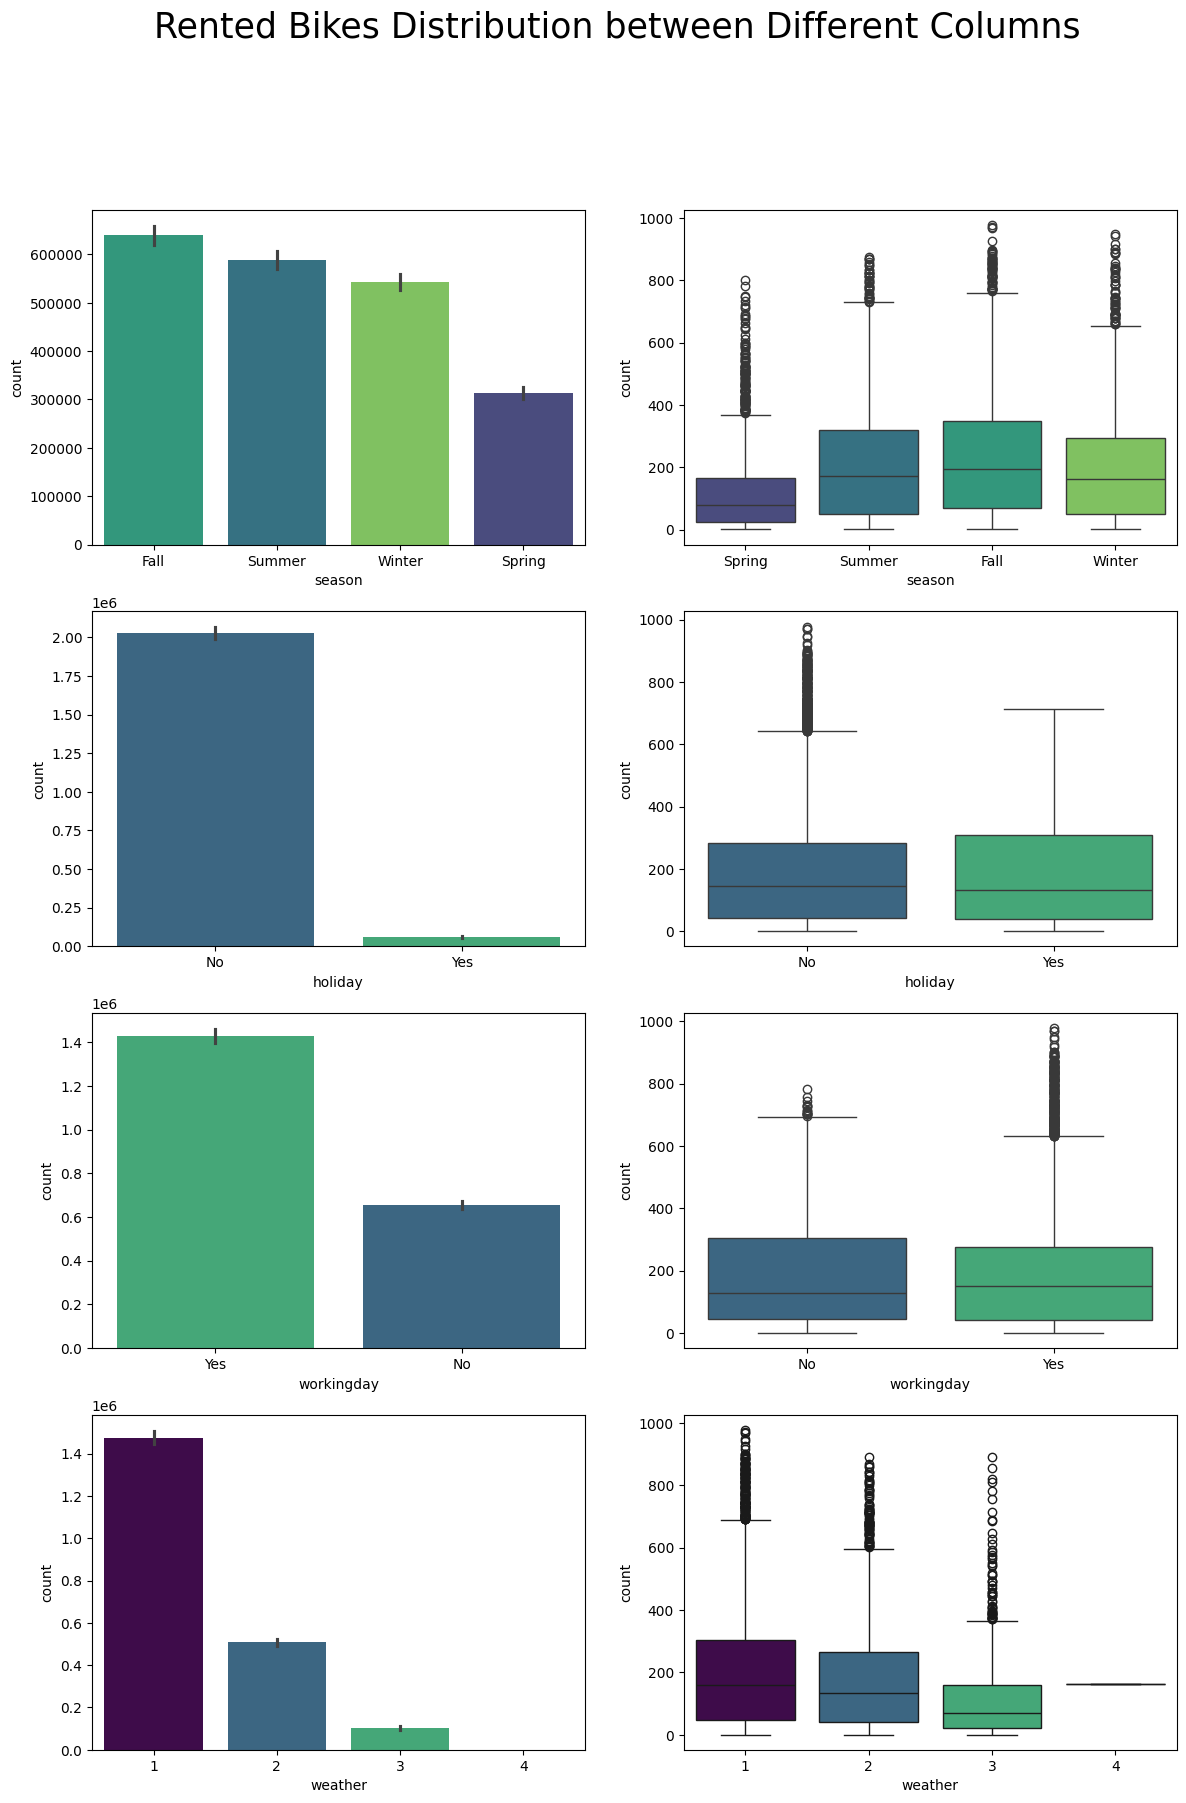

In [28]:
counter = 1
plt.figure(figsize = (14,20))
for i, j in enumerate(cat_col):
  i = i + counter
  plt.subplot(4,2,i)
  sns.barplot(x = data[j], y = data["count"] , palette = "viridis",hue = j ,estimator = np.sum , legend = False , data = data, order = data.groupby(j)["count"].sum().sort_values(ascending = False).index)
  plt.subplot(4,2,i+1)
  sns.boxplot(x = data[j], y = data["count"], hue = j, data = data, palette = "viridis", legend = False)
  counter = counter + 1
plt.suptitle("Rented Bikes Distribution between Different Columns", fontsize = 25)
plt.show()

**Insights** 🧐

- Seasonal Trends: Fall and summer have the highest bike rental counts, with spring showing the lowest rental activity.
- Holiday Impact: Non-holiday days see significantly higher bike rentals compared to holidays.
- Working Day Effect: Bike rentals are more common on working days than on non-working days.
- Weather Influence: Favorable weather conditions (clear or partly cloudy) correspond to higher bike rentals, with adverse weather (rain, snow) leading to fewer rentals.

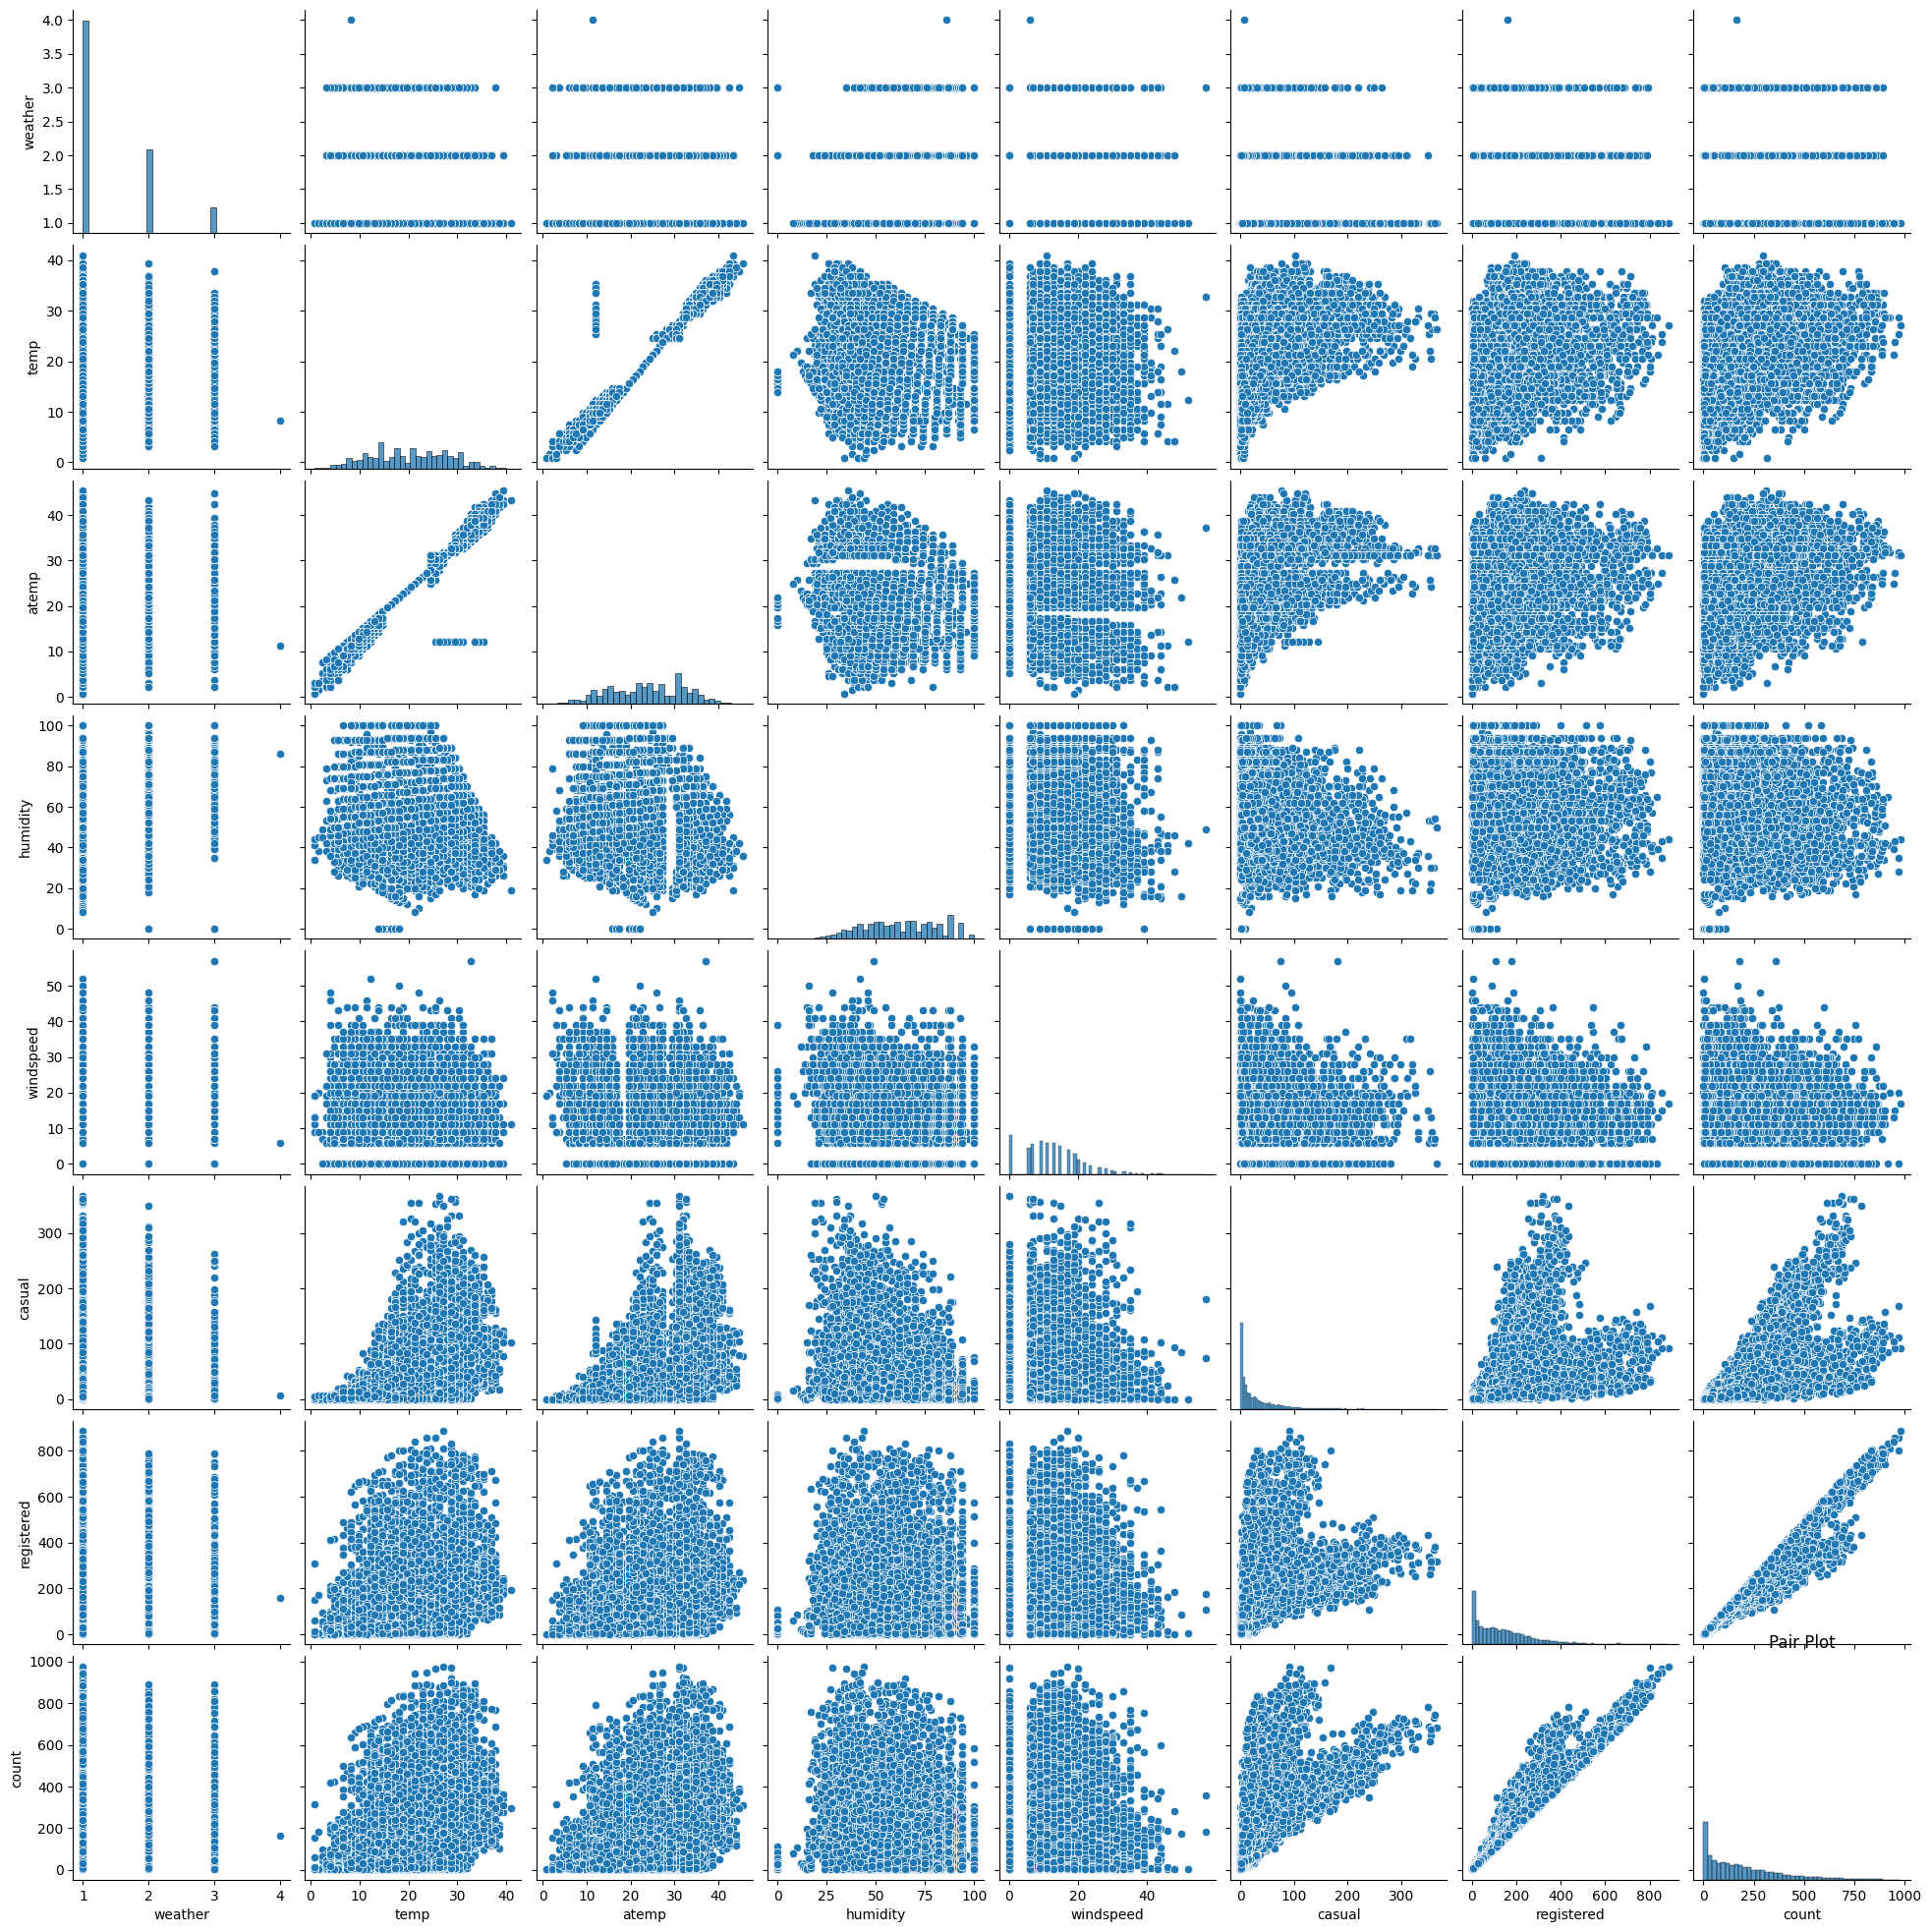

In [29]:
sns.pairplot(data)
plt.show()

In [30]:
data_corr = data.corr(numeric_only = True)
data_corr

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


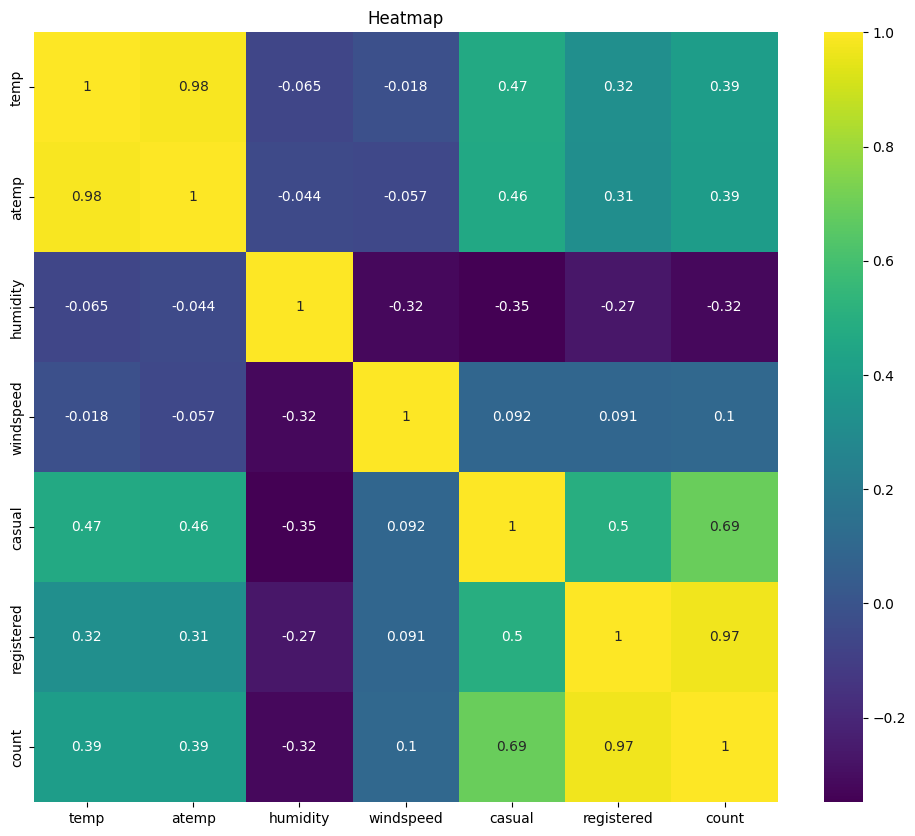

In [31]:
plt.figure(figsize = (12,10))
sns.heatmap(data_corr, annot = True, cmap = "viridis")
plt.title("Heatmap")
plt.show()

**Correlation Insights 🧐**
- Temperature ('temp') & Casual Rentals: Higher temperatures are moderately associated with an increase in casual bike rentals.
- Humidity & Bike Rentals: Higher humidity levels are negatively correlated with both casual and registered bike rentals, indicating fewer rentals on more humid days.
- Casual & Registered Rentals: There is a strong positive correlation between casual and registered rentals, suggesting that both user groups tend to increase or decrease their rentals in tandem.
- Registered Rentals & Total Count: The total bike rentals are highly correlated with registered rentals, showing that registered users significantly contribute to the overall rental count.

# **Hypothesis Testing**

# 1. Does Working Day has effect on number of electric cycles rented

Null Hypothesis(H0) : Working day doest not have any effect on the number of electric cycles rented.


Alternate Hypothesis(Ha) : Working day does have a significant effect on the number of electric cycles rented.


In [32]:
data.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
No,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
Yes,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


# Assumptions Check:

1. Normality Check  :  QQ PLOT , Histogram , Shapiro-Wilk test
2. Variance Check   :  Levene's Test

# Normality Check

## Histogram to check Normality of distribution

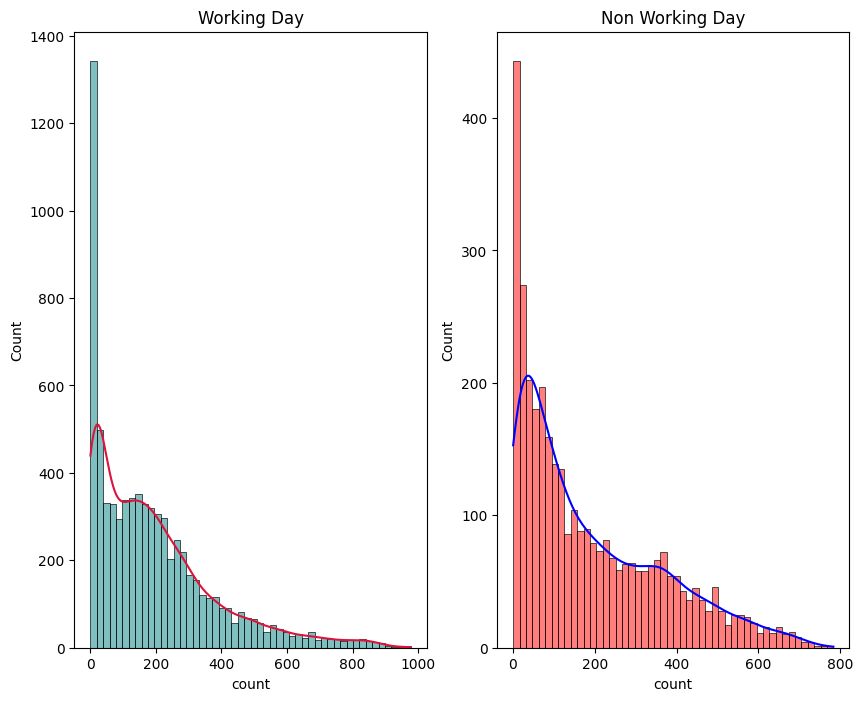

In [33]:
working_day = data[data["workingday"] == "Yes"]["count"]
non_working_day = data[data['workingday']== "No"]["count"]

plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.histplot(working_day , bins = 50 , kde = True, color = "teal").lines[0].set_color("crimson")
plt.title("Working Day")
plt.subplot(1,2,2)
sns.histplot(non_working_day  , bins = 50  , kde = True, color = "red").lines[0].set_color("blue")
plt.title("Non Working Day")
plt.show()

**Insights :**
Both Working And Non Working Days distribution does not follow a normal distribution

## QQ Plot to check Distribution

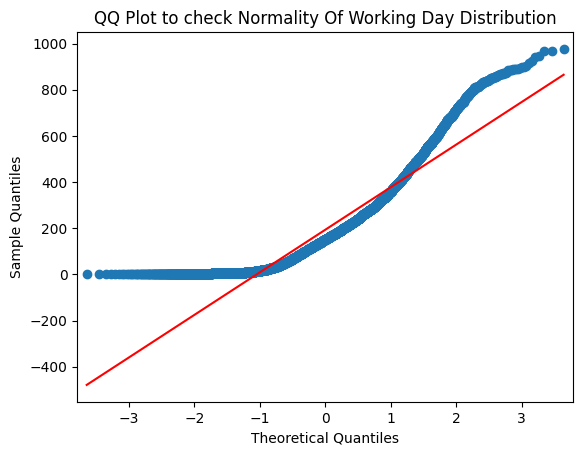

In [34]:
from statsmodels.graphics.gofplots import qqplot
qqplot(working_day , line = 's')
plt.title("QQ Plot to check Normality Of Working Day Distribution")
plt.show()

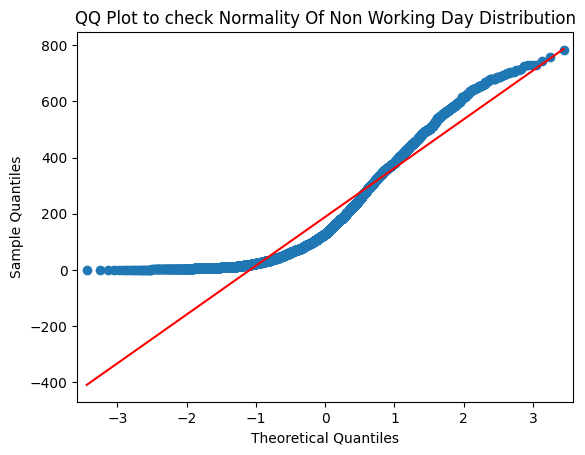

In [35]:
qqplot(non_working_day , line = 's')
plt.title("QQ Plot to check Normality Of Non Working Day Distribution")
plt.show()

It can be inferred from the above plots that both distributions do not follow normal distribution

## Shapiro-Wilk Test to check Distribution
____________________________

Significance Level : 0.05

In [99]:
stat,pval = shapiro(working_day.sample(1000))
if pval < 0.05:
  print("Working Day distribution does not follow a normal distribution")
else:
  print("Working day distribution follow a normal distribution")
print(f"Test Statistics : {stat}")

Working Day distribution does not follow a normal distribution
Test Statistics : 0.8757418085451186


In [100]:
stat,pval = shapiro(non_working_day.sample(1000))
if pval < 0.05:
  print("Non Working Day distribution does not follow a normal distribution")
else:
  print("Non Working day distribution follow a normal distribution")
print(f"Test Statistics : {stat}")

Non Working Day distribution does not follow a normal distribution
Test Statistics : 0.887351562604938


## Variance Check with Levene's Test
_________________________
Significance Level : 0.05

In [98]:
stat , pval = levene(working_day,non_working_day)

if pval < 0.05:
  print("Both Groups DON'T have equal variance")
else:
  print("Both Groups have equal variance")
print(f"Test Statistics {stat}")

Both Groups have equal variance
Test Statistics 0.004972848886504472


## Performing Two sample independent Ttest
______________________________________

Null Hypothesis(H0) : Working day doest not have any effect on the number of electric cycles rented.

Alternate Hypothesis(Ha) : Working day does have a significant effect on the number of electric cycles rented.

_____________________________________

Significance Level : 0.05

In [97]:
tstat , pval = ttest_ind(working_day , non_working_day)

if pval < 0.05 :
  print(f"Working day does have a significant effect on the number of electric cycles rented. (Reject Null Hypothesis). pvalue = {pval}")
else:
  print(f" Working day doest not have any effect on the number of electric cycles rented. (Fail to Reject Null Hypothesis). pvalue = {pval}  " )
print(f" T Test Statistics {tstat}")

 Working day doest not have any effect on the number of electric cycles rented. (Fail to Reject Null Hypothesis). pvalue = 0.22644804226361348  
 T Test Statistics 1.2096277376026694


**Insight** 🧐


The p-value is greater than 0.05, so we do not have sufficient evidence to reject the null hypothesis. This suggests that working days do not have a significant effect on the number of cycles being rented.

____________________________________________

## 2. Does No. of cycles rented similar or different in different seasons

Null Hypothesis(H0) :  No. of cycles rented similar in different seasons


Alternate Hypothesis(Ha) :No. of cycles rented different (Not Similar) in different seasons

Significance Level : 0.05

In [40]:
data.groupby("season")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
Spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
Summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
Winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


## Assumptions Check:
- Normality Check : QQ PLOT , Histogram , Shapiro-Wilk test
- Variance Check : Levene's Test

In [41]:
fall  = data[data["season"]== "Fall"]["count"]
spring = data[data["season"]== "Spring"]["count"]
summer = data[data["season"]== "Summer"]["count"]
winter = data[data["season"]== "Winter"]["count"]

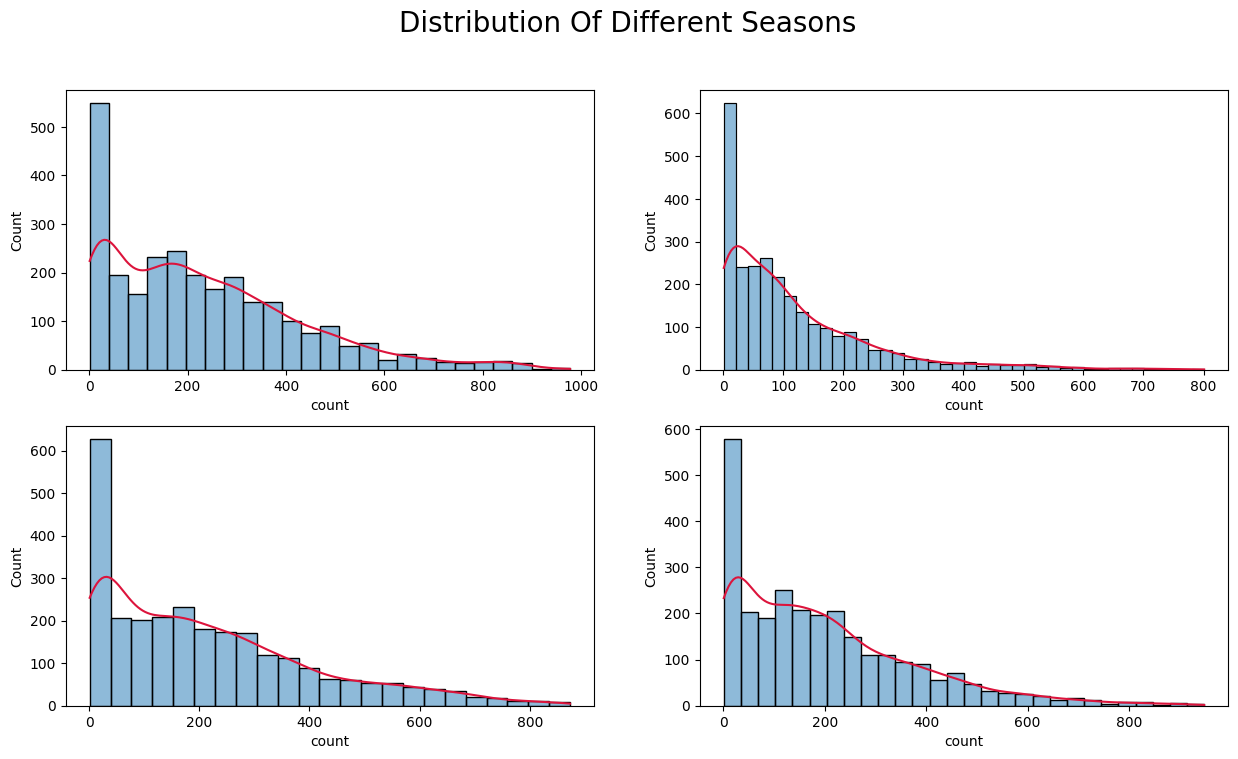

In [42]:
col = [fall,spring,summer,winter]

plt.figure(figsize = (15,8))

for i , j in enumerate(col):
  plt.subplot(2,2,i+1)
  sns.histplot(j, kde = True).lines[0].set_color("crimson")
plt.suptitle("Distribution Of Different Seasons",fontsize = 20)
plt.show()


None of the season follow a Normal Distribution

## QQ Plot to check Distribution

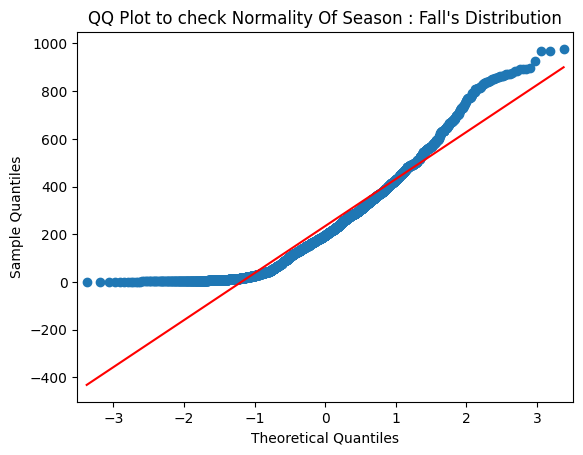

In [43]:
qqplot(fall , line = 's')
plt.title("QQ Plot to check Normality Of Season : Fall's Distribution")
plt.show()

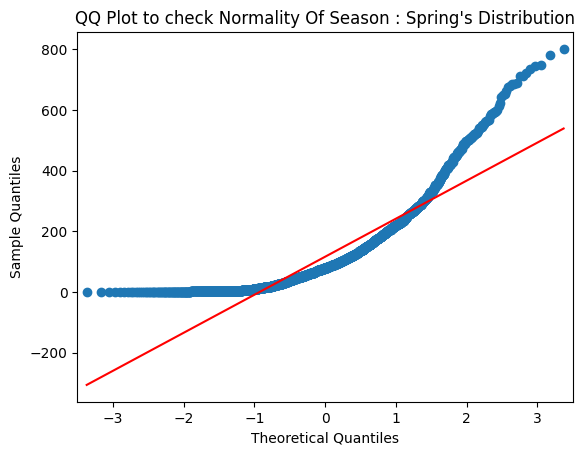

In [44]:
qqplot(spring , line = 's')
plt.title("QQ Plot to check Normality Of Season : Spring's Distribution")
plt.show()

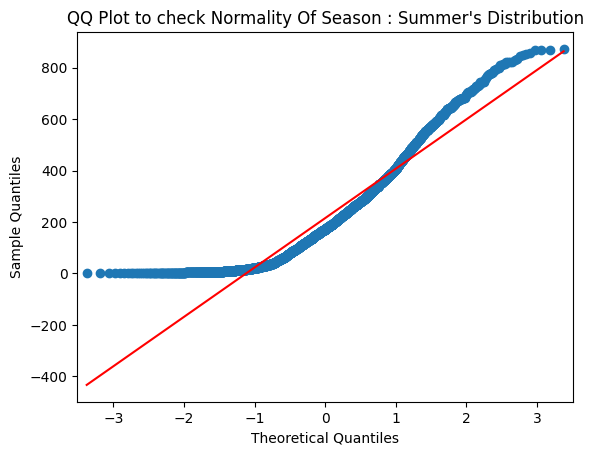

In [46]:
qqplot(summer , line = 's')
plt.title("QQ Plot to check Normality Of Season : Summer's Distribution")
plt.show()

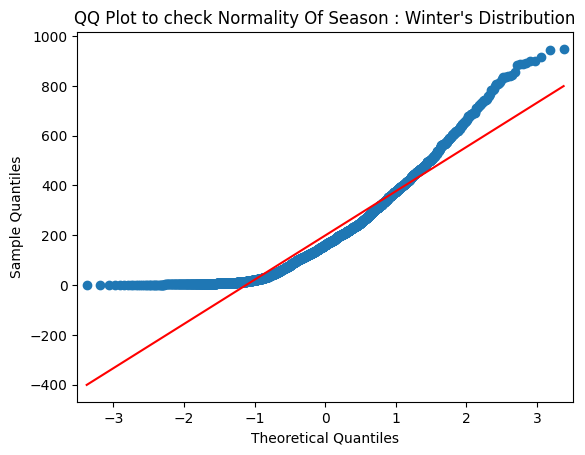

In [45]:
qqplot(winter , line = 's')
plt.title("QQ Plot to check Normality Of Season : Winter's Distribution")
plt.show()

It can be inferred from the above plots that All of the distributions do not follow normal distribution

## Shapiro-Wilk Test to check Distribution
____________________________

Significance Level : 0.05

In [47]:
print(f"Fall Shapiro test {shapiro(fall.sample(1000))}")
print(f"Spring Shapiro test{shapiro(spring.sample(1000))}")
print(f"Summer Shapiro test{shapiro(summer.sample(1000))}")
print(f"Winter Shapiro test{shapiro(winter.sample(1000))}")


Fall Shapiro test ShapiroResult(statistic=0.917205470905348, pvalue=5.898771632800522e-23)
Spring Shapiro testShapiroResult(statistic=0.8126775767385872, pvalue=1.5906498188623922e-32)
Summer Shapiro testShapiroResult(statistic=0.9156442139888155, pvalue=3.7280910849798274e-23)
Winter Shapiro testShapiroResult(statistic=0.8850695372271604, pvalue=1.3757119731965683e-26)



All Distribution have pvalue less than singificance level(0.05) after doing a shapiro wilk test to check it's distribution.

Which conclude that none of the distribution follows a normal distribution

## Variance Check with Levene's Test
_________________________
Significance Level : 0.05

In [95]:
stat , pval = levene(fall,spring,summer,winter)

if pval < 0.05:
  print("All Season Groups DON'T have equal variance")
else:
  print("All Season Groups have equal variance")
print(f"Test Statistics {stats}")

All Season Groups DON'T have equal variance
Test Statistics 236.94671081032115


## Approach 📊
**Although two of the three conditions for ANOVA are not met, we will still proceed with the ANOVA test.**

Additionally, **we will conduct Kruskal's test for comparison.**

**If there are any discrepancies between the results, we will rely on Kruskal's test, as the data does not fully meet the assumptions required for ANOVA.**







## Performing Anova Test between different Seasons

-----------------------------

Null Hypothesis(H0) : No. of mean cycles rented similar in different seasons.

Alternate Hypothesis(Ha) :No. of mean cycles rented different (Not Similar) in atleast one season.

In [94]:
stats,pvalue = f_oneway(fall,spring,summer,winter)
if pvalue < 0.05:
  print(f"Reject Null Hypothesis :  No. of mean cycles rented different (Not Similar) in atleast one season. pvalue = {pvalue}")
else:
  print(f"Fail to reject Null Hypothesis :  No. of mean cycles rented similar in different seasons. pvalue = {pvalue}")
print(f"Test Statistics {stats}")

Reject Null Hypothesis :  No. of mean cycles rented different (Not Similar) in atleast one season. pvalue = 6.164843386499654e-149
Test Statistics 236.94671081032115


## Performing Kruskal-Wallis Test between different Seasons

-----------------------------

Null Hypothesis(H0) : No. of median cycles rented similar in different season.

Alternate Hypothesis(Ha) :No. of median cycles rented different (Not Similar) in atleast one season.

In [93]:
stats,pvalue = kruskal(fall,spring,summer,winter)
if pvalue < 0.05:
  print(f"Reject Null Hypothesis :  No. of mean cycles rented different (Not Similar) in atleast one season. pvalue = {pvalue}")
else:
  print(f"Fail to reject Null Hypothesis :  No. of mean cycles rented similar in different seasons. pvalue = {pvalue}")
print(f"Test Statistics {stats}")

Reject Null Hypothesis :  No. of mean cycles rented different (Not Similar) in atleast one season. pvalue = 2.479008372608633e-151
Test Statistics 699.6668548181988


**Insights** :

Both(ANOVA, KRUSKAL) tests reject the null hypothesis
therefore we can conclude that ->  No. of cycles rented different (Not Similar) in different season.

________________________________________________

# 3. Does No. of cycles rented similar or different in different weather

Null Hypothesis(H0) : No. of cycles rented similar in different weather

Alternate Hypothesis(Ha) :No. of cycles rented different (Not Similar) in different weather

Significance Level : 0.05

In [57]:
data.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**We Won't Consider Weather Type 4 for the test as it has only 1 data.**

## Assumptions Check:
- Normality Check : QQ PLOT , Histogram , Shapiro-Wilk test
- Variance Check : Levene's Test

In [58]:
clear  = data[data["weather"]== 1]["count"]
mist = data[data["weather"]== 2]["count"]
light_rain = data[data["weather"]== 3]["count"]
heavy_rain = data[data["weather"]== 4]["count"]

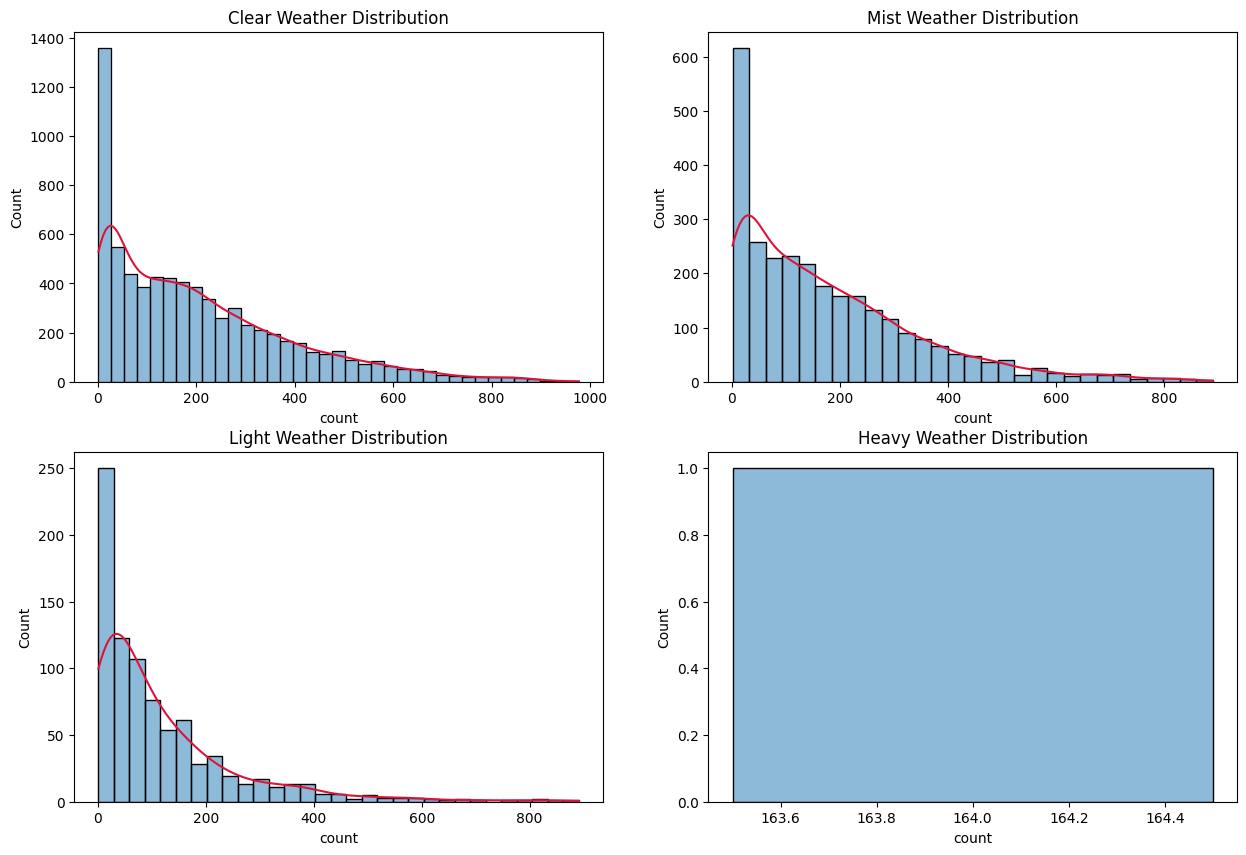

In [66]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.histplot(clear, kde = True).lines[0].set_color("crimson")
plt.title("Clear Weather Distribution")
plt.subplot(2,2,2)
sns.histplot(mist, kde = True).lines[0].set_color("crimson")
plt.title("Mist Weather Distribution")
plt.subplot(2,2,3)
sns.histplot(light_rain, kde = True).lines[0].set_color("crimson")
plt.title("Light Weather Distribution")
plt.subplot(2,2,4)
sns.histplot(heavy_rain, kde = True)
plt.title("Heavy Weather Distribution")
plt.suptitle("Weather Distribution ")
plt.show()


Weather's Does not follow a Normal Distribution

## QQ Plot to check Distribution

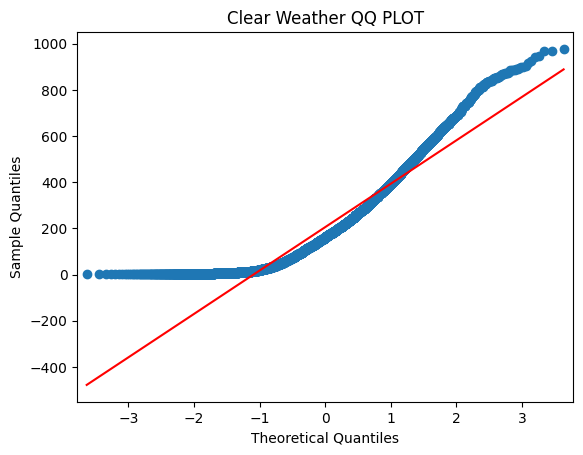

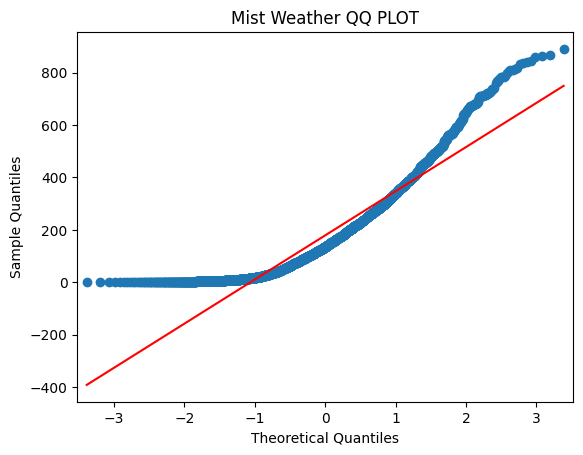

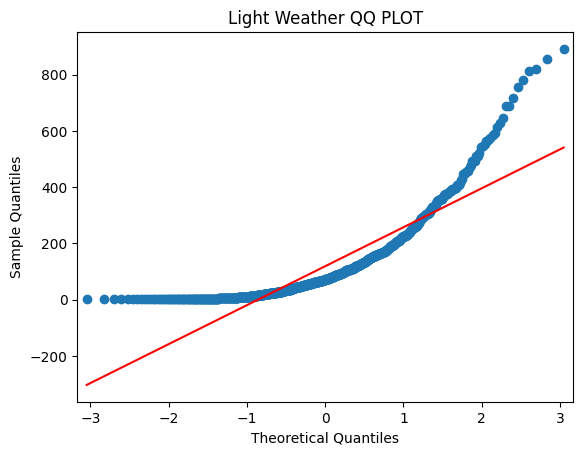

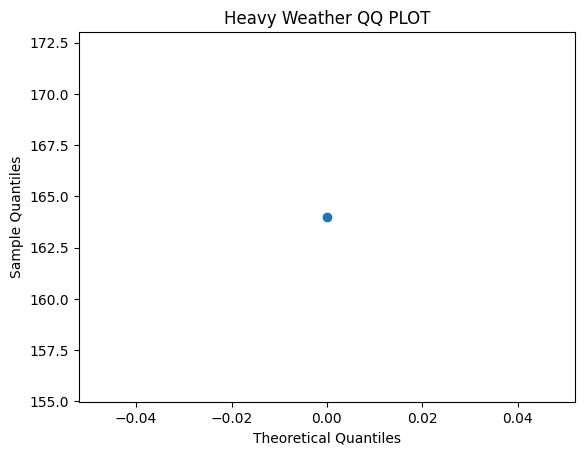

In [77]:
qqplot(clear,line = "s")
plt.title("Clear Weather QQ PLOT")
plt.show()
qqplot(mist,line = "s")
plt.title("Mist Weather QQ PLOT")
plt.show()
qqplot(light_rain,line = "s")
plt.title("Light Weather QQ PLOT")
plt.show()
qqplot(heavy_rain,line = "s")
plt.title("Heavy Weather QQ PLOT")
plt.show();

## Shapiro-Wilk Test to check Distribution
____________________________

Significance Level : 0.05

In [79]:
print(f"Clear weather Shapiro test {shapiro(clear.sample(500))}")
print(f"Mist weather Shapiro test{shapiro(mist.sample(500))}")
print(f"Light weather Shapiro test{shapiro(light_rain.sample(500))}")


Clear weather Shapiro test ShapiroResult(statistic=0.8837728452021186, pvalue=6.111046598830799e-19)
Mist weather Shapiro testShapiroResult(statistic=0.8813461643636147, pvalue=3.9182007834378593e-19)
Light weather Shapiro testShapiroResult(statistic=0.7686355783643485, pvalue=6.086371735849988e-26)


All Distribution have pvalue less than singificance level(0.05) after doing a shapiro wilk test to check it's distribution.

Which conclude that none of the distribution follows a normal distribution . **Not Considering Weather type 4(Heavy Weather) as it's only have 1 observation(data)**

## Variance Check with Levene's Test
_________________________
Significance Level : 0.05

In [91]:
stats , pvalue = levene(clear,mist,light_rain,heavy_rain)
if pval < 0.05:
  print("All Weather Groups DON'T have equal variance")
else:
  print("All Weather Groups have equal variance")
print(f"Test Statistics {stats}")

All Weather Groups DON'T have equal variance
Test Statistics 54.85106195954556


## Approach 📊
**Although two of the three conditions for ANOVA are not met, we will still proceed with the ANOVA test.**

Additionally, **we will conduct Kruskal's test for comparison.**

**If there are any discrepancies between the results, we will rely on Kruskal's test, as the data does not fully meet the assumptions required for ANOVA.**






## Performing Anova Test between different Weather

-----------------------------

Null Hypothesis(H0) : No. of mean cycles rented similar in different weather.

Alternate Hypothesis(Ha) :No. of mean cycles rented different (Not Similar) in atleast one weather.

In [90]:
stats,pvalue = f_oneway(clear,mist,light_rain,heavy_rain)
if pvalue < 0.05:
  print(f"Reject Null Hypothesis :  No. of mean cycles rented different (Not Similar) in atleast one weather type. pvalue = {pvalue}")
else:
  print(f"Fail to reject Null Hypothesis :  No. of mean cycles rented similar in different weather. pvalue = {pvalue}")
print(f"Test Statistics {stats}")

Reject Null Hypothesis :  No. of mean cycles rented different (Not Similar) in atleast one weather type. pvalue = 5.482069475935669e-42
Test Statistics 65.53024112793271


## Performing Kruskal-Wallis Test between different Weather

-----------------------------

Null Hypothesis(H0) : No. of median cycles rented similar in different weather.

Alternate Hypothesis(Ha) :No. of median cycles rented different (Not Similar) in atleast one weather.

In [89]:
stats,pvalue = kruskal(clear,mist,light_rain,heavy_rain)
if pvalue < 0.05:
  print(f"Reject Null Hypothesis :  No. of mean cycles rented different (Not Similar) in atleast one weather type. pvalue = {pvalue}")
else:
  print(f"Fail to reject Null Hypothesis :  No. of mean cycles rented similar in different weather. pvalue = {pvalue}")
print(f"Test Statistics {stats}")

Reject Null Hypothesis :  No. of mean cycles rented different (Not Similar) in atleast one weather type. pvalue = 3.501611300708679e-44
Test Statistics 205.00216514479087


**Insights** :

Both(ANOVA, KRUSKAL) tests reject the null hypothesis
therefore we can conclude that ->  No. of cycles rented different (Not Similar) in different weathers.

____________________________________

##4.Test Whether weather is dependent on season Or not.

Null Hypothesis (H0): Weather is independent of the season

Alternate Hypothesis (Ha): Weather is dependent on the season

Significance Level : 0.05

In [102]:
contingency_table = pd.crosstab(data['weather'], data['season'])

contingency_table

season,Fall,Spring,Summer,Winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


## Prerequisite Note for Chi-Square Test 📝
The Chi-square test is a non-parametric test used to determine the association between two categorical features.
Since we have two categorical features ('season' and 'weather'), the Chi-square test is applicable here. Under the null hypothesis (H₀), the test statistic should follow a Chi-Square distribution.



### Assumptions:
- The data in the cells should be frequencies or counts of cases.
- The levels (or categories) of the variables are mutually exclusive.
- There are two variables, and both are measured as categories.
- The expected value for each cell should be 5 or more in at least 80% of the cells.

## Performing Chi-square Test between Weather and Season

Null Hypothesis (H0): Weather is independent of the season

Alternate Hypothesis (Ha): Weather is dependent on the season

In [111]:
stat,pvalue,dof,expect_freq = chi2_contingency(contingency_table)
if pvalue < 0.05:
  print("Reject Null Hypothesis : Weather is dependent on the season ")
else :
  print("Fail to reject Null Hypothesis : Weather is independent of the season ")

print(f"pvalue = {pval}")
print(f"Test Statistic = {stat}")

Reject Null Hypothesis : Weather is dependent on the season 
pvalue = 2.3377247599391937e-26
Test Statistic = 49.15865559689363


**Insights**:

We can Conclude that Weather and Season are dependent on each other

____________________________

# **Combined Insights 📊**

- 19% of users are casual, while 81% are registered, indicating a strong preference for registered rentals.
- More bikes are rented during the summer and fall seasons, with a 65.41% annual growth in hourly rental demand from 2011 to 2012.
- Rental bike demand peaks during spring and summer, with a decline in fall and a further drop in winter.
- On holidays and weekends, bike rentals are notably higher, with adverse weather conditions like rain, thunderstorms, snow, or fog reducing rentals.
- Temperature affects rentals, with over 80% of bike rentals occurring when the temperature is below 28°C and fewer bikes rented when the temperature drops below 10°C.
- Wind speed plays a role, as over 85% of the rentals happen when the wind speed is below 20. When wind speeds exceed 35, rentals significantly decrease.
- The highest bike rental counts occur in clear and cloudy weather, with lower rentals in misty and rainy conditions, and very few records in extreme weather.

# **Recommendation 🚴‍♂️**

- Focus marketing efforts on spring and summer with special promotions, discounts, or packages to align with higher demand periods.
- Implement dynamic pricing strategies with lower rates during off-peak hours and higher rates during peak times to optimize resource use.
- Adjust bike availability based on weather conditions, reducing stock during rainy or extremely cold days and increasing it during favorable weather.
- Offer weekend sign-up discounts or loyalty programs to encourage casual users to become registered members and boost retention.
- Provide amenities like umbrellas, rain jackets, or water bottles to enhance customer comfort and encourage repeat business.
- Partner with weather services to integrate real-time updates into the rental app, allowing users to make informed rental decisions.
- Schedule regular maintenance checks before peak seasons to keep the bike fleet in optimal condition and reduce breakdowns.
- Use seasonal marketing and dynamic pricing strategies to align with demand and optimize resource utilization.